# La roue des émotions

In [1]:
import pandas as pd
import string
import numpy as np

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams


import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import copy
from collections import Counter

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer,HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\straw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Data\emotions_final.csv', sep=',')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Classes du dataset

In [5]:
S = df['Emotion'].value_counts()
S

joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

#### Countplot

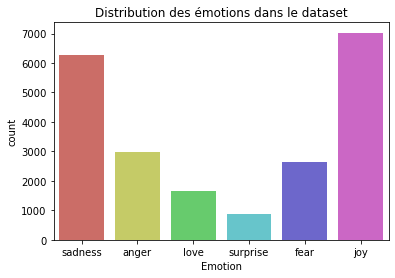

In [6]:
sns.countplot(x='Emotion', data=df, palette='hls')
plt.title('Distribution des émotions dans le dataset')
plt.show()

#### Piechart

In [7]:
fig = px.pie(S, values=S.values, names=S.index, title='Distribution des émotions dans le dataset')
fig.show()

### Normalisation

In [8]:
lowers = []
for i in range(0, df.shape[0]):
    lowers.append(df['Text'][i].lower())

In [9]:
df['Text'] = lowers
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 melissa stared at her friend in dism
21455    successive state elections have seen the gover...
21456                 vincent was irritated but not dismay
21457    kendall-hume turned back to face the dismayed ...
21458                      i am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

### Tokénization

In [10]:
df['Text'] = df['Text'].apply(word_tokenize)
df['Text']

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
21454         [melissa, stared, at, her, friend, in, dism]
21455    [successive, state, elections, have, seen, the...
21456          [vincent, was, irritated, but, not, dismay]
21457    [kendall-hume, turned, back, to, face, the, di...
21458              [i, am, dismayed, ,, but, not, surpris]
Name: Text, Length: 21459, dtype: object

### Suppression des stop words

In [11]:
stopW = stopwords.words('english')
stopW.extend(list(string.punctuation))

In [12]:
def remove_stopwords(sent):
    tokens_without_stopW = [word for word in sent if word not in stopW]
    return tokens_without_stopW

In [13]:
df['Text'] = df['Text'].apply(lambda sent: remove_stopwords(sent))

### Stemming et Lemmatization

In [14]:
wnl = WordNetLemmatizer()

In [15]:
def lemmatize(sent, join=True):
    tokens = [wnl.lemmatize(wnl.lemmatize(wnl.lemmatize(w,'v'),'n'),'a') for w in sent]
    if join:
        return ' '.join(tokens)
    else:
        return tokens

In [16]:
df_explo = copy.deepcopy(df)

In [17]:
df['Text'] = df['Text'].apply(lambda sent: lemmatize(sent))

In [18]:
df_explo['Text'] = df_explo['Text'].apply(lambda sent: lemmatize(sent, join=False))

In [19]:
df_explo['Text']

0                                 [didnt, feel, humiliate]
1        [go, feel, hopeless, damn, hopeful, around, so...
2            [im, grab, minute, post, feel, greedy, wrong]
3        [ever, feel, nostalgic, fireplace, know, still...
4                                          [feel, grouchy]
                               ...                        
21454                        [melissa, star, friend, dism]
21455    [successive, state, election, see, govern, par...
21456                          [vincent, irritate, dismay]
21457       [kendall-hume, turn, back, face, dismay, coup]
21458                                    [dismay, surpris]
Name: Text, Length: 21459, dtype: object

### Exploration des données

In [20]:
df_explo['Length'] = df_explo['Text'].apply(len)
df_explo

,Text,Emotion,Length
0,"[didnt, feel, humiliate]",sadness,3
1,"[go, feel, hopeless, damn, hopeful, around, so...",sadness,9
2,"[im, grab, minute, post, feel, greedy, wrong]",anger,7
3,"[ever, feel, nostalgic, fireplace, know, still...",love,7
4,"[feel, grouchy]",anger,2
...,...,...,...
21454,"[melissa, star, friend, dism]",fear,4
21455,"[successive, state, election, see, govern, par...",fear,9
21456,"[vincent, irritate, dismay]",fear,3
21457,"[kendall-hume, turn, back, face, dismay, coup]",fear,6


### Statistiques sur les tailles des documents

In [21]:
df_explo['Length'].describe()

count    21459.000000
mean         9.327275
std          5.161167
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         35.000000
Name: Length, dtype: float64

### Distribution de la taille des documents après suppression des stopwords

In [22]:
trace1 = go.Histogram(
    x = df_explo['Length'],
    text = df_explo.Emotion,
    opacity=0.5,
)

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Distribution de la taille des documents après la suppression des stopwords',
                   xaxis=dict(title='Taille du document'),
                   yaxis=dict( title='Fréquence'),
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Word Cloud

In [23]:
texts = []
for i in range(0, df_explo.shape[0]):
    texts.append(df_explo['Text'][i])
words = [item for sublist in texts for item in sublist]

In [24]:
count_of_words = Counter(words)
df_words_count = pd.DataFrame(list(count_of_words.items()),columns = ['Word','Count'])

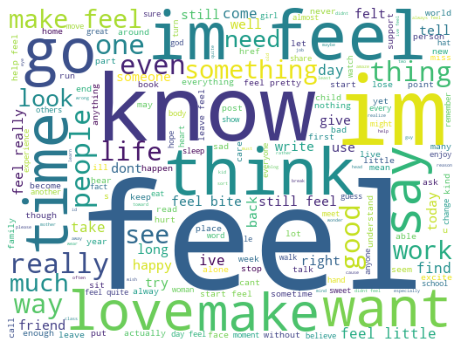

In [25]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                        background_color='white',
                        width=512,
                        height=384
                        ).generate(" ".join(words))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

In [26]:
tokens = word_tokenize('The girls wanted to play with their parents')
bigrams = ngrams(tokens, 2)

for words in bigrams:
    print(words)

('The', 'girls')
('girls', 'wanted')
('wanted', 'to')
('to', 'play')
('play', 'with')
('with', 'their')
('their', 'parents')


### Vectorisation des mots du dataset

In [27]:
tfidf = TfidfVectorizer()

### Définition du classifier

In [28]:
#classifier = MultinomialNB()
classifier = LinearSVC()
#classifier = SGDClassifier(max_iter=1000, tol=1e-3)
#classifier = KNeighborsClassifier()

### Définition de la pipeline

In [41]:
pipeline =  Pipeline([
    ('vect',TfidfVectorizer(stop_words='english',analyzer='word', ngram_range=(1,2))), 
    ('tfidf', TfidfTransformer()), 
    ('clf', LinearSVC())])

### Split train and validation datasets

In [49]:
X_train, X_val, y_train, y_val = train_test_split(df['Text'], df['Emotion'], stratify=df['Emotion'], shuffle=True, test_size=0.20)

In [50]:
clf = pipeline.fit(X_train, y_train)

In [51]:
pipeline.score(X_train, y_train)

0.9966214248267024

In [52]:
pipeline.score(X_val, y_val)

0.8863000931966449

### Classification report données d'entrainements

In [53]:
all_predictions = pipeline.predict(X_train)
print(classification_report(y_train, all_predictions))

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      2394
        fear       1.00      1.00      1.00      2122
         joy       1.00      1.00      1.00      5623
        love       0.99      0.99      0.99      1313
     sadness       1.00      1.00      1.00      5012
    surprise       0.99      0.99      0.99       703

    accuracy                           1.00     17167
   macro avg       1.00      0.99      0.99     17167
weighted avg       1.00      1.00      1.00     17167



### Matrice de confusion données d'entrainement

In [54]:
z = confusion_matrix(all_predictions, y_train)

x = list(np.unique(df.Emotion))
y =  list(np.unique(df.Emotion))

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

### Classification report données de validation

In [55]:
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.88      0.89       599
        fear       0.92      0.81      0.86       530
         joy       0.89      0.92      0.90      1406
        love       0.80      0.77      0.79       328
     sadness       0.90      0.93      0.91      1253
    surprise       0.80      0.76      0.78       176

    accuracy                           0.89      4292
   macro avg       0.87      0.85      0.86      4292
weighted avg       0.89      0.89      0.89      4292



### Matrice de confusion données de validation

In [56]:
z = confusion_matrix(y_pred, y_val)

x = list(np.unique(df.Emotion))
y =  list(np.unique(df.Emotion))

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

# Gridsearch

In [57]:
param_grid = [
    {
        #'vect':[
        #    CountVectorizer(),
        #    HashingVectorizer(n_features=2500, alternate_sign=False),
        #    TfidfVectorizer()
        #],
        'clf': [
            svm.SVC(kernel='rbf'),
            svm.SVC(kernel='linear'),
            svm.SVC(kernel='poly')
        ],   
    }
]

In [ ]:
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
joblib.dump(grid_res, 'Output\models\hog_models.pkl')

In [ ]:
print('Best Estimator :',grid_res.best_estimator_)